<a href="https://colab.research.google.com/github/datawilly/modelo-regresion-lineal-simple/blob/main/Modelo_Regresion_Lineal_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelo de Resgresion Lineal Simple
Vamos a calcular el precio de una vivienda mediante una regresion lineal simple usando el dataset de ejemplo de sklearn

Iniciamos importando nuestras librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importamos el dataset de ejemplo de la libreria sklearn y lo instanciamos

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

Usamos DESCR para leer la informacion de este dataset

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Como es una regresion lineal simple vamos a tomar solo el feature RM que es el numero promedio de habitaciones de las casas

In [ ]:
x = boston.data[:,5]
x

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

Definimos nuestra variable objetivo, normalmente sería igual que como definimos x pero en este caso el dataset nos permite usar TARGET para establecerla

In [ ]:
y = boston.target
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

Las trasnformamos en un array

In [ ]:
x = np.array(x)
y = np.array(y)

La siguiente es la formula que nos permite establecer el metodo de minimos cuadrados ordinarios para identificar la distancia minima de error entre los puntos y la regresion lineal

MCO
$\beta = (X^{T}X)^{-1}X^{T}Y$

Vamos a realizar una inspeccion visual de los datos a través de un gráfico tipo scatter

<function matplotlib.pyplot.show>

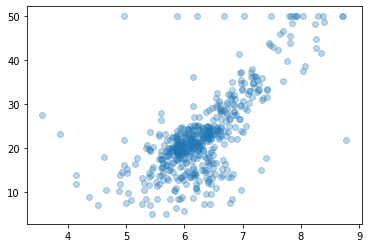

In [ ]:
plt.scatter(x,y,alpha=0.3)
plt.show

Las siguientes dos lineas están comentadas debido a que si ejecutamos el código de esta manera nos va a dar un error al momento de calcular B debido a que X debe transponerse para que no exista un error de dimensión y se pueda realizar la operacion entre matrices

In [ ]:
#X = np.array([np.ones(X.shape),X])

In [ ]:
#B = np.linalg.inv(X.T @ X) @ X.T @ y

De esta manera podemos ver las dimensiones de una matriz en este caso es de 506 filas y una columna

In [ ]:
x.shape

(506,)

En esta parte definimos nuestra $\beta$ teniendo cuidado de transponer nuestra X para no tener errores

In [ ]:
X = np.array([np.ones(x.shape),x]).T
B = np.linalg.inv(X.T @ X) @ X.T @ y

Como resultado tenemos que $\beta$ tiene su intercepto en -34.67062078 y su pendiente es 9.10210898

In [ ]:
B

array([-34.67062078,   9.10210898])

Dibujamos nuestra regresion lineal para ver si se ajusta a los puntos

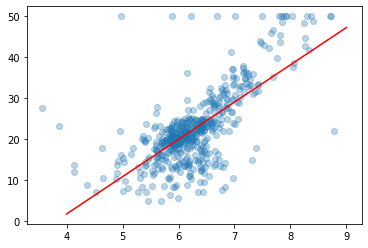

In [ ]:
plt.scatter(x,y,alpha=0.3)
plt.plot([4,9],[B[0]+B[1]*4,B[0]+B[1]*9],c='red')
plt.show()

Vamos a entrenar nuestro modelo de regresion lineal con sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
R2 = model.score(X,y)

In [ ]:
R2

0.4835254559913343

Podemos notar que nuestro coeficiente de determinacion no es tan bueno, eso quiere decir que nuestras variables no logran explicar del todo las variaciones en y, pero el intercepto y la pendiente concuerdan con los resultados de nuestro ejercicio anterior

In [ ]:
print('R2 = {}, b0 = {}, b1 = {}'.format(R2,model.intercept_,model.coef_[1]))

R2 = 0.4835254559913343, b0 = -34.670620776438554, b1 = 9.102108981180308


In [ ]:
X

array([[1.   , 6.575],
       [1.   , 6.421],
       [1.   , 7.185],
       ...,
       [1.   , 6.976],
       [1.   , 6.794],
       [1.   , 6.03 ]])

Es importante entregar en el modelo una variable x_test que sea un array con las mismas dimensiones del modelo entrenado para que podamos realizar la prediccion

In [ ]:
x_test = np.array([[1,5]])
pred = model.predict(x_test)

A pesar de que nuestro coeficiente de determinacion puede ser mejorado integrando mas variables a nuestro modelo, para efectos de verificar el correcto entrenamiento del mismo podemos realizar una prediccion de acuerdo al numero de cuartos



In [ ]:
print(pred)

[10.83992413]


Como podemos ver cuando la casa tiene un numero de 5 habitaciones nuestra prediccion se acerca mucho a la representacion gráfica de nuestra regresion lineal

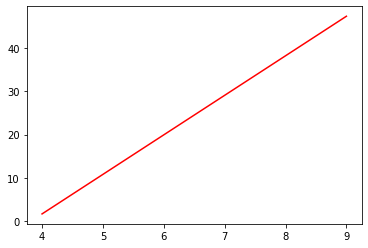

In [ ]:
plt.plot([4,9],[B[0]+B[1]*4,B[0]+B[1]*9],c='red')
plt.show()

In [ ]:
x_test = np.array([[1,7.5]])
pred = model.predict(x_test)
print(pred)

[33.59519658]
